# CAPE and Returns
This notebook links the preformance of MSCI Indices with the Cyclically-Adjusted Price Earnings Ratio (CAPE). There are 28 indices for major countries or regions.

In [1]:
# Imports
import seaborn as sns
import pandas as pd
import os
import numpy as np
import statsmodels.formula.api as smf
import random
import matplotlib.pyplot as plt

sns.set(style="ticks")

msci = pd.read_excel(r"C:\Users\porcelr\Desktop\MSCI and CAPE.xlsx", index_col=0, sheet_name='Index Data Net')
smallcap = pd.read_excel(r"C:\Users\porcelr\Desktop\MSCI and CAPE.xlsx", index_col=0, sheet_name='Small Cap Net')
momentum = pd.read_excel(r"C:\Users\porcelr\Desktop\MSCI and CAPE.xlsx", index_col=0, sheet_name='Momentum Net')
cape = pd.read_excel(r"C:\Users\porcelr\Desktop\MSCI and CAPE.xlsx", index_col=0, sheet_name='CAPE')

countries = list(msci)
countriessml = list(smallcap)
countriesmtm = list(momentum)

Cut-off date: 2001-01-31 00:00:00


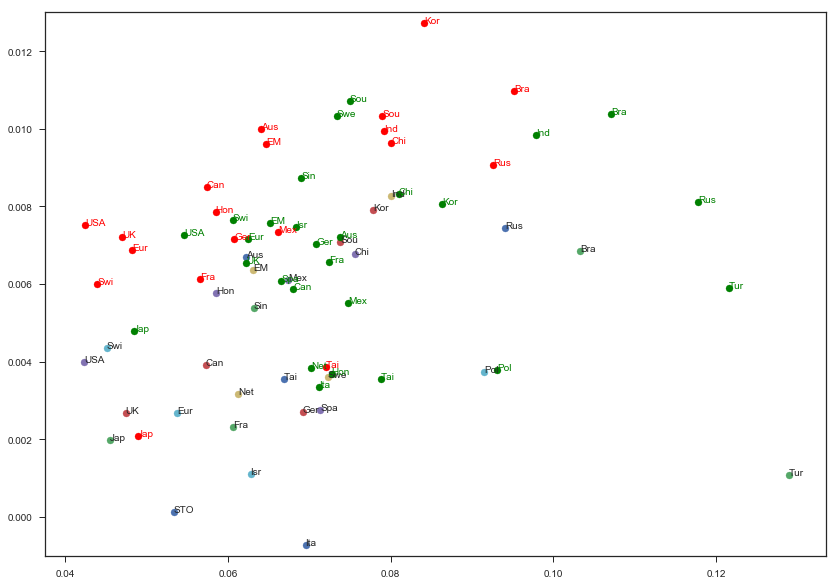

In [2]:
timeframe =215

print('Cut-off date:',msci.iloc[timeframe].name)

rets = np.log(msci/msci.shift(-1))
retmtm = np.log(momentum/momentum.shift(-1))
retsml = np.log(smallcap/smallcap.shift(-1))

fig=plt.figure(figsize=(14,10))
for country in countries:
    plt.scatter(rets[country].head(timeframe).std(), rets[country].head(timeframe).mean())
    plt.text(rets[country].head(timeframe).std(), rets[country].head(timeframe).mean(), country[0:3])

for country in countriesmtm:
    plt.scatter(retmtm[country].head(timeframe).std(), retmtm[country].head(timeframe).mean(), color='red')
    plt.text(retmtm[country].head(timeframe).std(), retmtm[country].head(timeframe).mean(), country[0:3], color='red')

for country in countriessml:
    plt.scatter(retsml[country].head(timeframe).std(), retsml[country].head(timeframe).mean(), color='green')
    plt.text(retsml[country].head(timeframe).std(), retsml[country].head(timeframe).mean(), country[0:3], color='green')
    
    plt.ylim(-0.001,0.013)
    #plt.xlim(0,)

In [18]:
sharpe = pd.DataFrame()
sharpe['Index'] = rets.head(timeframe).mean()/ rets.head(timeframe).std()
sharpe['IndexMtm'] = retmtm.head(timeframe).mean()/ retmtm.head(timeframe).std()
sharpe['IndexSml'] = retsml.head(timeframe).mean()/ retsml.head(timeframe).std()
sharpe['PerfMtm'] = sharpe['IndexMtm']-sharpe['Index']
sharpe['PerfSml'] = sharpe['IndexSml']-sharpe['Index']
print(sharpe.sort_values(['PerfMtm']))
print(sharpe.dropna().mean())

                Index  IndexMtm  IndexSml   PerfMtm   PerfSml
Japan        0.043718  0.042773  0.098602 -0.000945  0.054884
Taiwan       0.053148  0.053672  0.045029  0.000524 -0.008119
Russia       0.079052  0.097949  0.068782  0.018897 -0.010270
Mexico       0.090705  0.110869  0.073841  0.020165 -0.016864
India        0.103270  0.125721  0.100604  0.022451 -0.002665
China        0.089452  0.120155  0.102647  0.030704  0.013196
SouthAfrica  0.096032  0.130588  0.142866  0.034556  0.046834
HongKong     0.098600  0.134110  0.050674  0.035510 -0.047926
Switzerland  0.096517  0.136322  0.126359  0.039805  0.029843
EM           0.100659  0.148584  0.116167  0.047925  0.015507
Australia    0.107780  0.156108  0.097808  0.048327 -0.009972
Brazil       0.066339  0.115409  0.096754  0.049070  0.030415
Korea        0.101480  0.151187  0.093464  0.049707 -0.008016
France       0.038136  0.108178  0.090844  0.070042  0.052708
Germany      0.039028  0.117579  0.099133  0.078552  0.060106
Canada  

Calculating the forward percentage change over one, five and ten years for every index

In [3]:
oneyrchg = np.log(msci[countries]/msci[countries].shift(-12))
oneyrchg = oneyrchg.shift(12)
oneyrchg = oneyrchg.add_suffix('_1')
fiveyrchg = np.log(msci[countries]/msci[countries].shift(-60))
fiveyrchg = fiveyrchg.shift(60)
fiveyrchg = fiveyrchg.add_suffix('_5')
tenyrchg = np.log(msci[countries]/msci[countries].shift(-120))
tenyrchg = tenyrchg.shift(120)
tenyrchg = tenyrchg.add_suffix('_10')

__Regular Markowitz chart__

Cut-off date: 2001-01-31 00:00:00


C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


(-0.0007032364311022142, 0.00843295052053173)

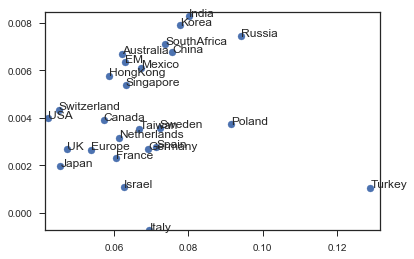

In [4]:
timeframe=215

rt = rets[countries].head(timeframe).mean()
st = rets[countries].head(timeframe).std()

#fig=plt.figure(figsize=(6,6))
for i in range(len(countries)):
    plt.text(st[i], rt[i], countries[i])
plt.scatter(st, rt)
plt.xlim(st.min()*.98,st.max()*1.02)
plt.ylim(rt.min()*.98,rt.max()*1.02)

### Scatterplots and linear regressions
Drawing scatterplots for the relationship between CAPE and returns. Because the relationship between returns and CAPE is not linear, we apply logs to the CAPE, so that we can then apply linear regression models.

Australia:	 Intercept = 1.449	 CAPE = -0.025	 R2 = 0.157
Canada:	 Intercept = 0.848	 CAPE = -0.001	 R2 = 0.001
China:	 Intercept = 1.392	 CAPE = -0.026	 R2 = 0.821
Europe:	 Intercept = 1.942	 CAPE = -0.05	 R2 = 0.545
France:	 Intercept = 0.574	 CAPE = -0.008	 R2 = 0.128
Germany:	 Intercept = 1.653	 CAPE = -0.033	 R2 = 0.517
HongKong:	 Intercept = 2.136	 CAPE = -0.044	 R2 = 0.102
India:	 Intercept = 2.042	 CAPE = -0.045	 R2 = 0.911
Israel:	 Intercept = -0.234	 CAPE = 0.015	 R2 = 0.055
Italy:	 Intercept = 0.473	 CAPE = -0.009	 R2 = 0.034
Japan:	 Intercept = 1.272	 CAPE = -0.018	 R2 = 0.264
Korea:	 Intercept = 1.774	 CAPE = -0.059	 R2 = 0.669
Mexico:	 Intercept = 2.775	 CAPE = -0.078	 R2 = 0.843
Netherlands:	 Intercept = 2.102	 CAPE = -0.061	 R2 = 0.617
Poland:	 Intercept = 1.381	 CAPE = -0.065	 R2 = 0.648
Russia:	 Intercept = 0.602	 CAPE = -0.052	 R2 = 0.72
Singapore:	 Intercept = 2.001	 CAPE = -0.048	 R2 = 0.346
SouthAfrica:	 Intercept = 2.032	 CAPE = -0.064	 R2 = 0.754
Spain:	 Intercep

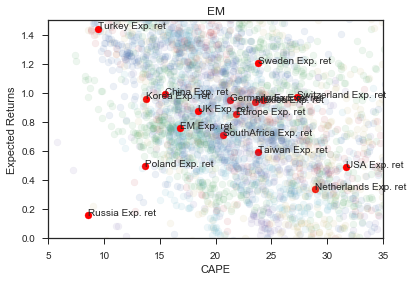

In [4]:
for country in countries:
    jt = pd.concat([cape[country+'_CAPE'],oneyrchg[country+'_1'], fiveyrchg[country+'_5'], tenyrchg[country+'_10']], axis=1)
    jt = jt.dropna()
    plt.scatter(jt[country+'_CAPE'], jt[country+'_10'], alpha=0.1)
    regr =country+'_10 ~ '+country+'_CAPE'
    results = smf.ols(regr, data=jt).fit()
    intercpt=round(results.params.values[0],3)
    capecoeff = round(results.params.values[1],3)
    curr_cape=cape[country+"_CAPE"].iloc[0]
    pred_ret=capecoeff*cape[country+"_CAPE"].iloc[0]+intercpt
    print(country+":\t Intercept = "+ str(intercpt)+ "\t CAPE = "+ str(capecoeff)+
            "\t R2 = "+ str(round(results.rsquared,3)))
    #Only plot if R2>0.5
    if(results.rsquared>0.5):
        plt.scatter(curr_cape,pred_ret, color='r')
        plt.xlim(5,35)
        plt.ylim(0,1.5)
        plt.text(curr_cape, pred_ret, country + " Exp. ret")
        plt.title(country)
        plt.xlabel('CAPE')
        plt.ylabel('Expected Returns')

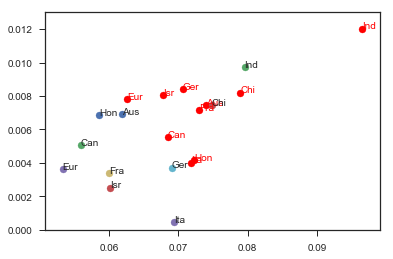

In [5]:
#country = 'Japan'
timeframe =210
for country in countries[0:10]:
    plt.scatter(retsml[country].head(timeframe).std(), retsml[country].head(timeframe).mean(), color='red')
    plt.text(retsml[country].head(timeframe).std(), retsml[country].head(timeframe).mean(), country[0:3], color='red')
    plt.scatter(rets[country].head(timeframe).std(), rets[country].head(timeframe).mean())
    plt.text(rets[country].head(timeframe).std(), rets[country].head(timeframe).mean(), country[0:3])
    plt.ylim(0,0.013)
    #plt.xlim(0,)

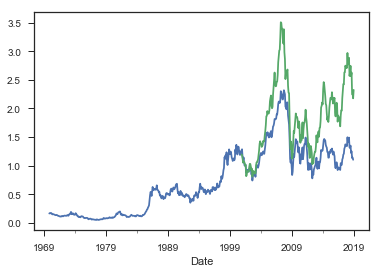

In [6]:
(msci[country]/msci[country].iloc[timeframe]).plot()
(smallcap[country]/smallcap[country].iloc[timeframe]).plot()

__Same as above but with a single country__

In [7]:
aa['curr']=np.log(msci['Australia']/msci['Australia'].shift(-1))
aa['lag']=aa.shift(-1)

smf.ols("curr~lag", data=aa).fit()

NameError: name 'aa' is not defined

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10,10))         # Sample figsize in inches
sns.heatmap(tenyrchg.dropna().corr(), cmap='plasma', ax=ax)

In [ ]:
df2 = pd.DataFrame()
df2['EM']=msci['EM']/msci['EM'][210]
df2['USA']=msci['USA']/msci['USA'][210]
df2['Europe']=msci['Europe']/msci['Europe'][210]
df2['mix'] = 1/3*df2['EM']+1/3*df2['USA']+1/3*df2['Europe']
df2.plot()